## Yapay Zeka ve Teknolojı Akademisi DATATHON 25' : 

#### Veri Kümesi Açıklaması : 
+ train.csv- eğitim seti
+ testFeatures.csv- test seti - fiyatların tahmin edilebilecekleri dosya
+ sample_submission.csv- örnek dosya yükleme formatı (testFeatures Tüm id'ler için tahmin edilebilir)

#### Veri içerisinde bulunan sütunların açıklamaları :
+ tarih- ürünün değiştirildiği tarih
+ ürün- İsmin
+ ürün besin değeri- ürünün sahip olduğu besin değeri
+ ürün kategorisi- ürünün ait olduğu kategori
+ ürün fiyatı- Fiyat
+ ürün üretim yeri- Satış yeri
+ market- ürünün satıldığı pazar
+ şehir- ürünün satıldığı şehir

#### Amaç : 

    Bu yarışmada amacımız onun ürününün satış fiyatını tahmin etmektir. Test setindeki onun idiçin ürün fiyatı değişkeninin değerini tahmin etmeniz gerekir.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [3]:
df = pd.read_csv("train.csv")
test=pd.read_csv("testFeatures.csv")
df.head(10)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S
5,2019-01-01,Bamya,42,sebze ve bakliyat,5.05,Yurt içi,K,S
6,2019-01-01,Barbunya-kuru,346,sebze ve bakliyat,6.09,Yurt içi,K,S
7,2019-01-01,Bezelye-taze,47,sebze ve bakliyat,11.96,Yurt içi,K,S
8,2019-01-01,Biber-yeşil,25,sebze ve bakliyat,12.10,Yurt içi,K,S
9,2019-01-01,Brüksel laha.,47,sebze ve bakliyat,22.93,Yurt içi,K,S


In [4]:
df.tail(10)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
227510,2023-12-01,Nar,77,meyve,38.35,Yurt dışı,Y,H
227511,2023-12-01,Portakal,41,meyve,15.99,Yurt dışı,Y,H
227512,2023-12-01,Şeftali,49,meyve,21.58,Yurt dışı,Y,H
227513,2023-12-01,Üzüm,74,meyve,21.56,Yurt dışı,Y,H
227514,2023-12-01,Vişne,57,meyve,17.12,Yurt dışı,Y,H
227515,2023-12-01,fındık,110,kuruyemiş,57.51,Yurt dışı,Y,H
227516,2023-12-01,fıstık,115,kuruyemiş,70.25,Yurt dışı,Y,H
227517,2023-12-01,kaju,100,kuruyemiş,70.21,Yurt dışı,Y,H
227518,2023-12-01,badem,110,kuruyemiş,62.87,Yurt dışı,Y,H
227519,2023-12-01,ceviz,120,kuruyemiş,78.72,Yurt dışı,Y,H


In [5]:
df.shape

(227520, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [7]:
df.dtypes

tarih                 object
ürün                  object
ürün besin değeri      int64
ürün kategorisi       object
ürün fiyatı          float64
ürün üretim yeri      object
market                object
şehir                 object
dtype: object

In [8]:
df.columns

Index(['tarih', 'ürün', 'ürün besin değeri', 'ürün kategorisi', 'ürün fiyatı',
       'ürün üretim yeri', 'market', 'şehir'],
      dtype='object')

In [9]:
nan_oranlari = df.isnull().mean().sort_values(ascending=False) * 100
nan_oranlari[nan_oranlari > 0]
nan_oranlari

tarih                0.0
ürün                 0.0
ürün besin değeri    0.0
ürün kategorisi      0.0
ürün fiyatı          0.0
ürün üretim yeri     0.0
market               0.0
şehir                0.0
dtype: float64

In [10]:
df.isnull().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [11]:
df.describe()

,ürün besin değeri,ürün fiyatı
count,227520.000000,227520.000000
mean,143.113924,17.018837
std,133.218871,14.470524
min,8.000000,0.740000
25%,41.000000,7.380000
50%,83.000000,12.860000
75%,250.000000,21.630000
max,402.000000,164.530000


In [12]:
numerik_degiskenler = df.select_dtypes(include=['int64', 'float64']).columns
print("Sayisal değişkenler:", numerik_degiskenler)

Sayisal değişkenler: Index(['ürün besin değeri', 'ürün fiyatı'], dtype='object')


In [13]:
kategorik_degiskenler = df.select_dtypes(include=['object', 'category', 'bool']).columns
print("Kategorik değişkenler:", kategorik_degiskenler)

Kategorik değişkenler: Index(['tarih', 'ürün', 'ürün kategorisi', 'ürün üretim yeri', 'market',
       'şehir'],
      dtype='object')


In [14]:
df["tarih"] = pd.to_datetime(df["tarih"])
df["tarih_sayi"] = df["tarih"].map(pd.Timestamp.toordinal)

In [15]:
df['ürün'].nunique()

79

In [16]:
df['ürün'].unique()

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [17]:
df['ürün kategorisi'].nunique()

6

In [18]:
df['ürün kategorisi'].unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [19]:
df['ürün kategorisi'].value_counts()

ürün kategorisi
sebze ve bakliyat              83520
meyve                          51840
tahıl ve ürünleri              34560
süt ürünleri ve kahvaltılık    34560
kuruyemiş                      14400
et                              8640
Name: count, dtype: int64

<Axes: xlabel='ürün kategorisi'>

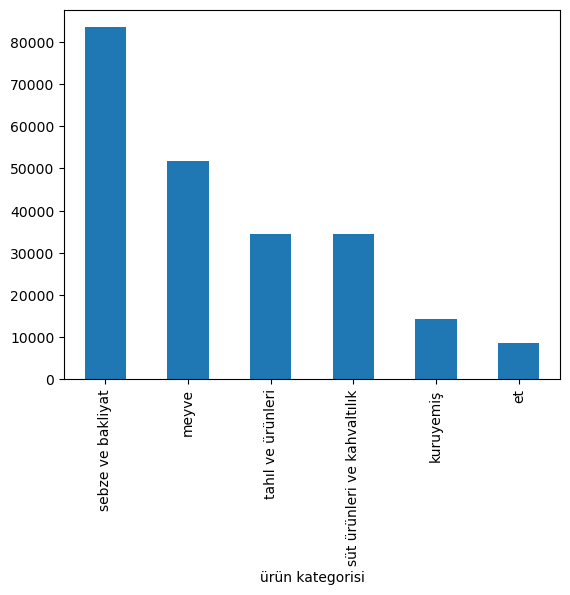

In [20]:
df['ürün kategorisi'].value_counts().plot.bar()

In [21]:
df['ürün üretim yeri'].value_counts()

ürün üretim yeri
Yurt içi     113760
Yurt dışı    113760
Name: count, dtype: int64

In [22]:
df['ürün üretim yeri'].unique()

array(['Yurt içi', 'Yurt dışı'], dtype=object)

<Axes: xlabel='ürün üretim yeri'>

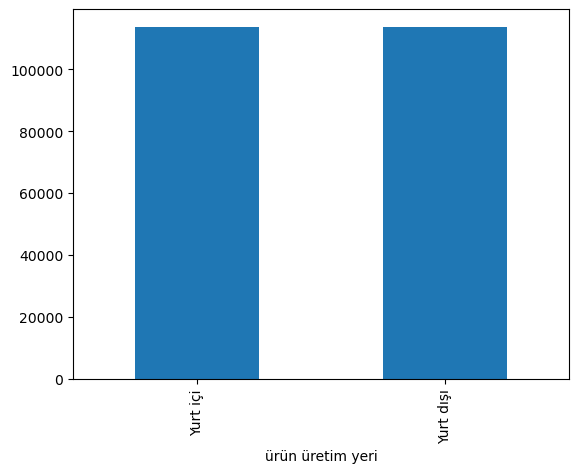

In [23]:
df["ürün üretim yeri"].value_counts().plot.bar()

In [24]:
df['şehir'].unique()

array(['S', 'E', 'V', 'A', 'L', 'F', 'G', 'H'], dtype=object)

In [25]:
df['market'].unique()

array(['K', 'C', 'Y'], dtype=object)

In [26]:
df['ürün besin değeri'].nunique()

56

In [27]:
df['ürün besin değeri'].unique()

array([120, 103, 160, 354,  72,  42, 346,  47,  25,  63, 333,  35,   8,
        19,  38,  24,  16,  15, 351, 376,  83,  27,  52,  32, 247, 350,
       390, 353, 368, 329, 402, 100, 150, 170, 200,  90, 125, 250, 400,
       375,  57,  39,  60,  80,  93,  28,  54,  79,  17,  36,  77,  41,
        49,  74, 110, 115])

In [28]:
df['urun_id'] = df['ürün'].astype('category').cat.codes
df.head()


,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,tarih_sayi,urun_id
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S,737060,65
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S,737060,70
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S,737060,61
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S,737060,1
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S,737060,2


şehir ve market gruplandırması. 3 tane market bulunuyor, peki her şehirde marketler ürünlerini aynı paraya mı satıyor? 

In [31]:
df.groupby("şehir")["ürün fiyatı"].mean()
## Şehir ve markete gore ortalama  urun fıyatı 


şehir
A    16.989788
E    17.009177
F    16.960585
G    17.052943
H    17.002563
L    17.043999
S    17.044352
V    17.047288
Name: ürün fiyatı, dtype: float64

In [32]:
df.groupby(["şehir", "market"])["ürün fiyatı"].sum()
#Şehir ve markete göre toplam ürün fiyat

şehir  market
A      C         161574.05
       K         160421.37
       Y         161194.16
E      C         160847.21
       K         161064.69
       Y         161829.08
F      C         160577.82
       K         160503.56
       Y         161277.66
G      C         161294.53
       K         162101.81
       Y         161589.37
H      C         161275.28
       K         160277.69
       Y         161999.93
L      C         162176.43
       K         160293.03
       Y         162261.88
S      C         161480.26
       K         161495.04
       Y         161766.08
V      C         162529.76
       K         161779.03
       Y         160516.09
Name: ürün fiyatı, dtype: float64

In [33]:
df.groupby("ürün kategorisi")["ürün besin değeri"].mean()
 # Her ürün kategorisinin ortalama besin değeri

ürün kategorisi
et                             127.666667
kuruyemiş                      111.000000
meyve                           55.944444
sebze ve bakliyat               90.689655
süt ürünleri ve kahvaltılık    204.583333
tahıl ve ürünleri              356.333333
Name: ürün besin değeri, dtype: float64

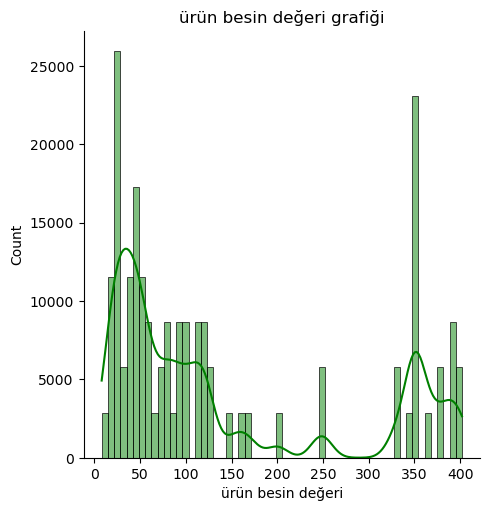

In [34]:
sns.displot( x="ürün besin değeri",data=df,color="green",kde=True)
plt.title("ürün besin değeri grafiği")
plt.show()

<Axes: xlabel='ürün fiyatı', ylabel='Count'>

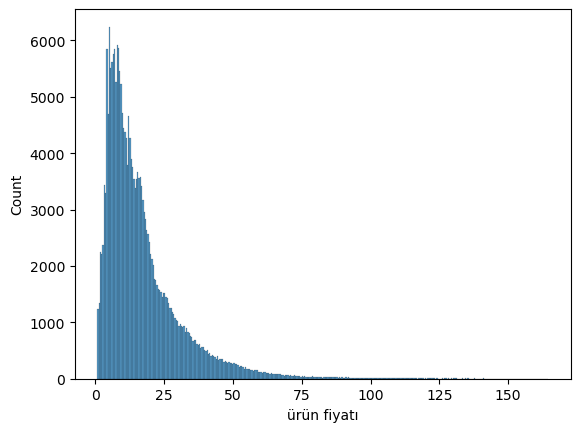

In [35]:
sns.histplot(df['ürün fiyatı'])

<Axes: xlabel='ürün besin değeri', ylabel='Count'>

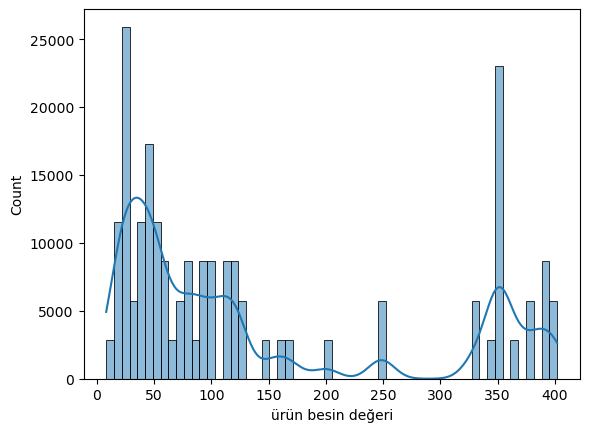

In [36]:
sns.histplot(data=df, x="ürün besin değeri", kde=True)

<Axes: xlabel='ürün fiyatı', ylabel='ürün kategorisi'>

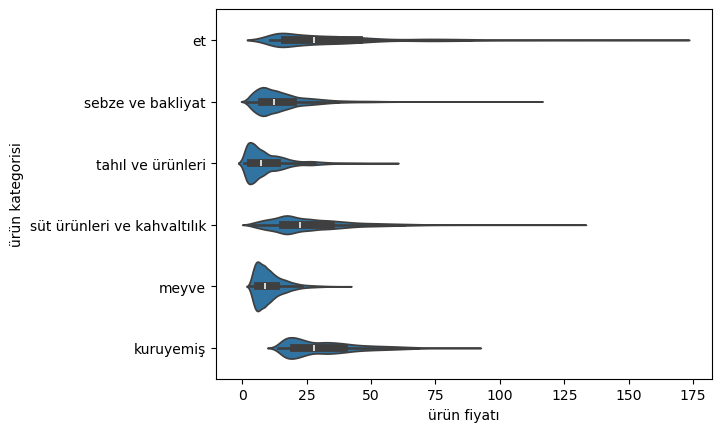

In [37]:
sns.violinplot(x=df['ürün fiyatı'], y=df['ürün kategorisi'])

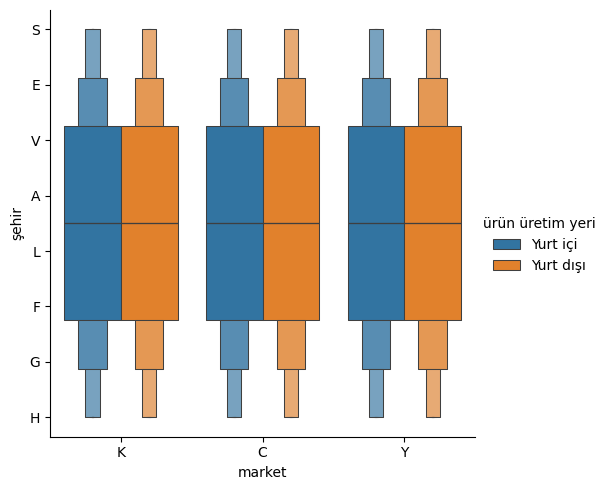

In [38]:
sns.catplot(data=df, x="market", y="şehir", hue="ürün üretim yeri", kind="boxen")

<Axes: xlabel='ürün kategorisi', ylabel='count'>

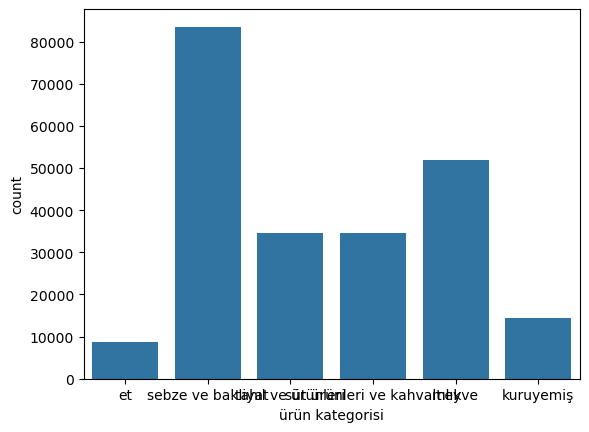

In [39]:
sns.countplot( x='ürün kategorisi', data=df)

<Axes: xlabel='market', ylabel='ürün fiyatı'>

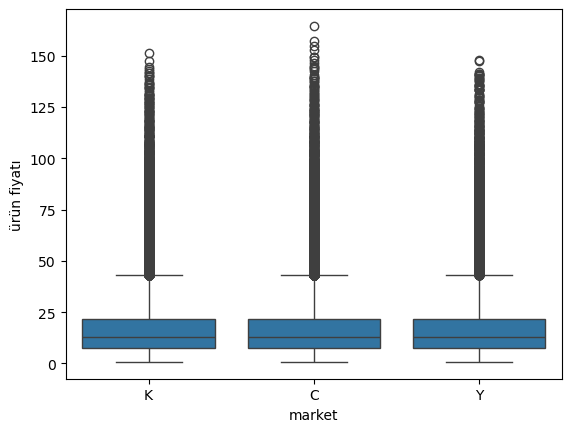

In [40]:
sns.boxplot(x='market', y='ürün fiyatı', data=df)

<Axes: xlabel='şehir', ylabel='ürün fiyatı'>

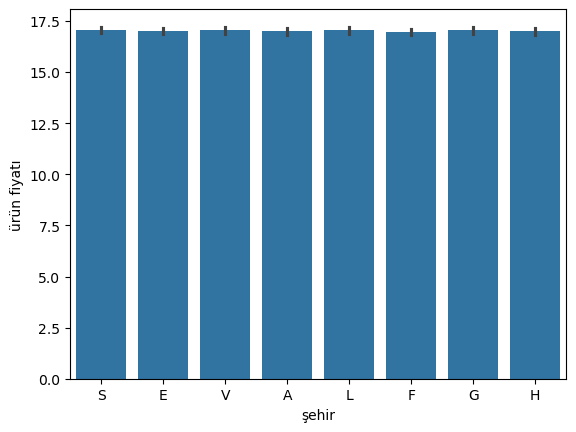

In [41]:
sns.barplot(x='şehir', y='ürün fiyatı', data=df)

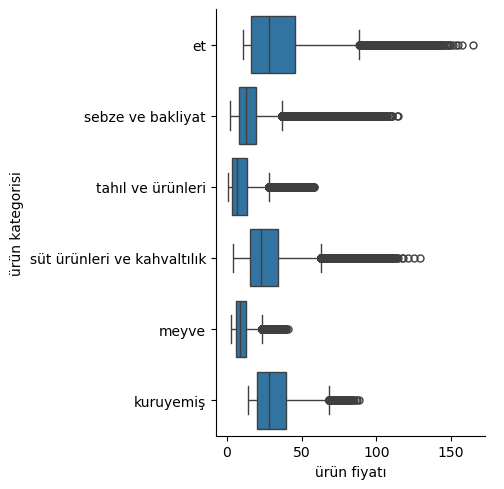

In [42]:
sns.catplot(data=df, x="ürün fiyatı", y="ürün kategorisi", kind="box")

<Axes: xlabel='ürün besin değeri', ylabel='ürün fiyatı'>

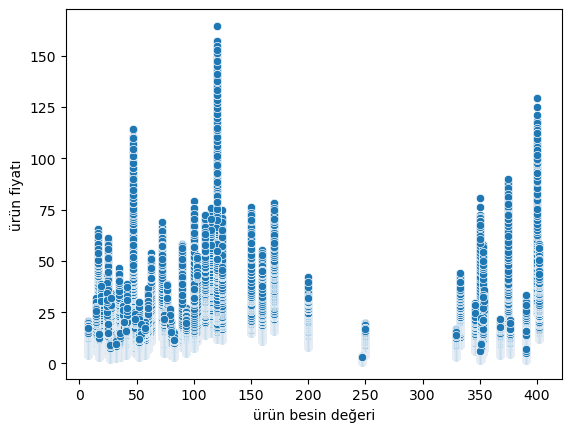

In [43]:
sns.scatterplot(x='ürün besin değeri', y='ürün fiyatı', data=df)

<Axes: xlabel='tarih', ylabel='ürün fiyatı'>

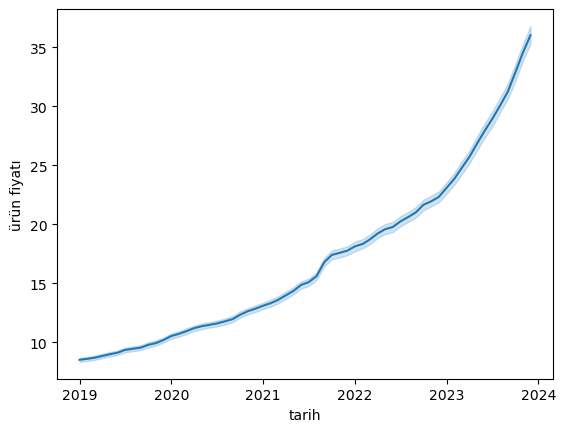

In [44]:
sns.lineplot(x='tarih', y='ürün fiyatı', data=df.sort_values('tarih'))

<Axes: xlabel='tarih', ylabel='ürün fiyatı'>

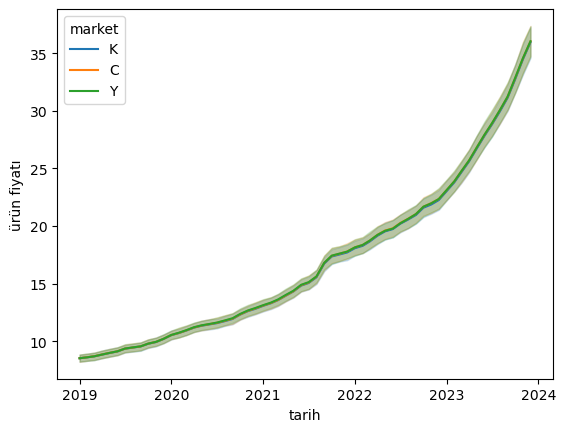

In [45]:
sns.lineplot(x='tarih', y='ürün fiyatı', hue='market', data=df)

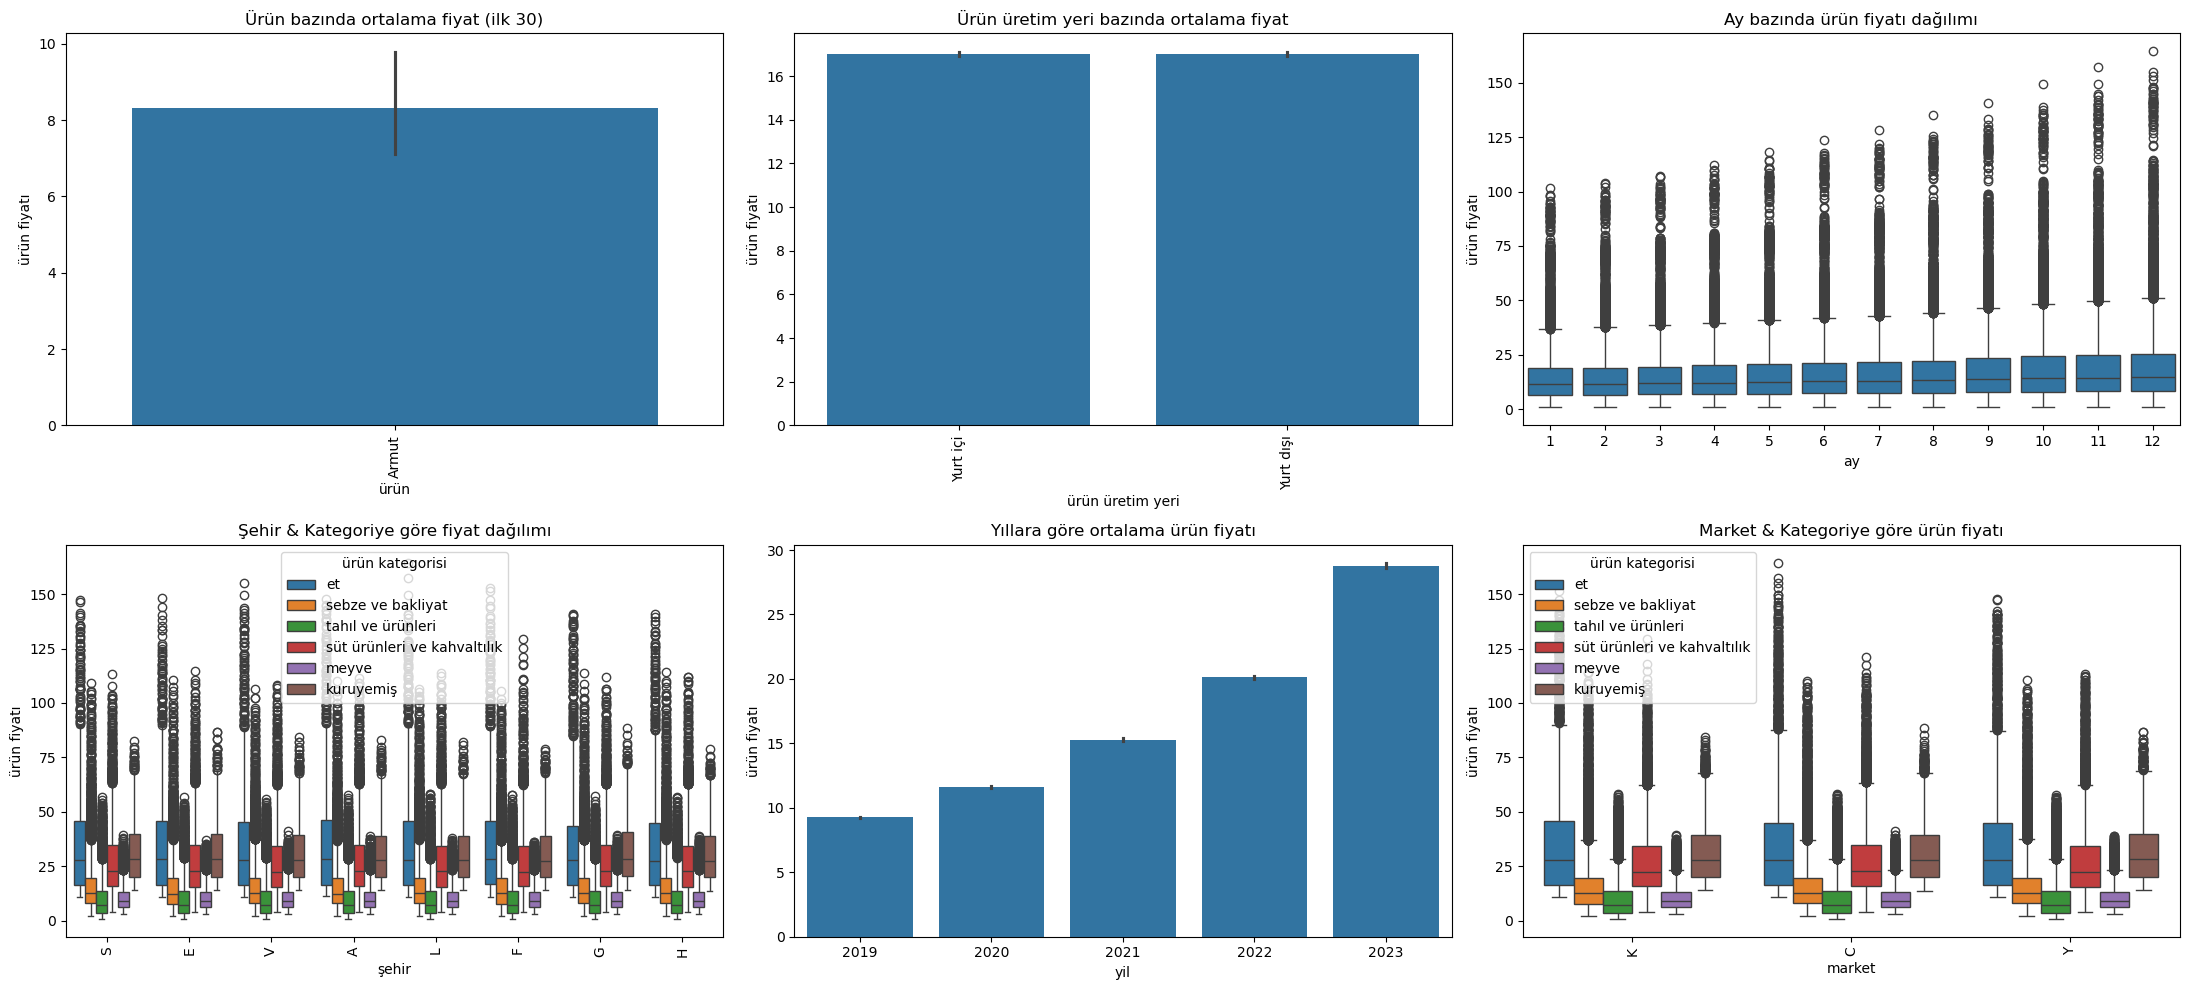

In [46]:
# Yeni grafikler: ürün adı, üretim yeri ve yıl gibi kategorik özelliklerin etkisi
df["tarih"] = pd.to_datetime(df["tarih"])
df["yil"] = df["tarih"].dt.year
df["ay"] = df["tarih"].dt.month

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))

# Ürün bazlı ortalama fiyat
sns.barplot(data=df.sort_values("ürün").head(30), x='ürün', y='ürün fiyatı', ax=axes[0, 0])
axes[0, 0].set_title("Ürün bazında ortalama fiyat (ilk 30)")
axes[0, 0].tick_params(axis='x', rotation=90)

# Üretim yeri bazlı ortalama fiyat
sns.barplot(data=df, x='ürün üretim yeri', y='ürün fiyatı', ax=axes[0, 1])
axes[0, 1].set_title("Ürün üretim yeri bazında ortalama fiyat")
axes[0, 1].tick_params(axis='x', rotation=90)

# Ay bazlı ortalama fiyat
sns.boxplot(data=df, x='ay', y='ürün fiyatı', ax=axes[0, 2])
axes[0, 2].set_title("Ay bazında ürün fiyatı dağılımı")

# Şehir & Kategoriye göre fiyat
sns.boxplot(data=df, x='şehir', y='ürün fiyatı', hue='ürün kategorisi', ax=axes[1, 0])
axes[1, 0].set_title("Şehir & Kategoriye göre fiyat dağılımı")
axes[1, 0].tick_params(axis='x', rotation=90)

# Yıla göre ortalama fiyat
sns.barplot(data=df, x='yil', y='ürün fiyatı', ax=axes[1, 1])
axes[1, 1].set_title("Yıllara göre ortalama ürün fiyatı")


# Market & Ürün kategorisine göre boxplot
sns.boxplot(data=df, x='market', y='ürün fiyatı', hue='ürün kategorisi', ax=axes[1, 2])
axes[1, 2].set_title("Market & Kategoriye göre ürün fiyatı")
axes[1, 2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



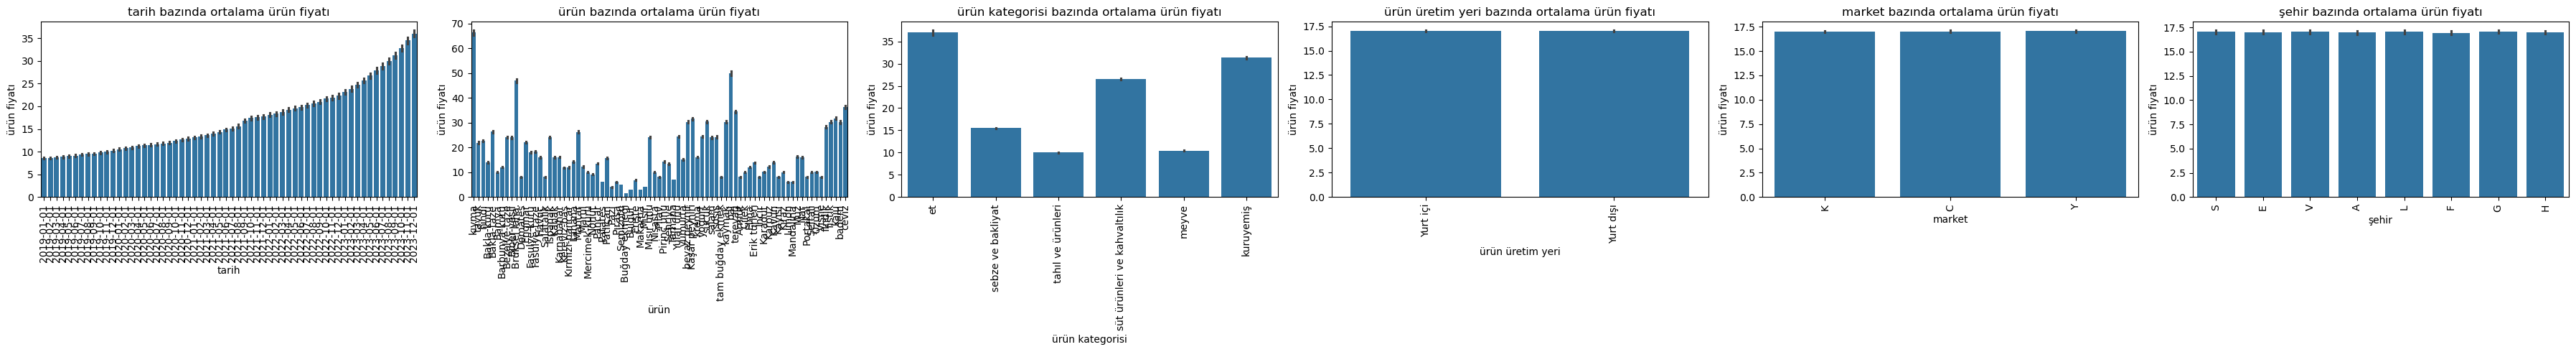

In [47]:

fig, axes = plt.subplots(nrows=1, ncols=len(kategorik_degiskenler), figsize=(6*len(kategorik_degiskenler), 5))

# Eğer sadece 1 plot olacaksa axes düz bir nesne döner, liste gibi yap
if len(kategorik_degiskenler) == 1:
    axes = [axes]

for i, col in enumerate(kategorik_degiskenler):
    sns.barplot(data=df, x=col, y='ürün fiyatı', ax=axes[i])
    axes[i].set_title(f"{col} bazında ortalama ürün fiyatı")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [48]:
# Korelasyon matrisi sadece sayısal sütunlarla yapılır
numeric_df = df.drop(columns=["tarih"])
correlation_matrix = numeric_df.corr(numeric_only=True)
correlation_matrix

,ürün besin değeri,ürün fiyatı,tarih_sayi,urun_id,yil,ay
ürün besin değeri,1.000000e+00,0.016097,-1.035824e-14,1.203882e-01,-8.628652e-15,-2.925478e-15
ürün fiyatı,1.609732e-02,1.000000,4.781435e-01,1.712166e-01,4.649085e-01,1.134083e-01
tarih_sayi,-1.035824e-14,0.478143,1.000000e+00,-2.789210e-15,9.799326e-01,1.993246e-01
urun_id,1.203882e-01,0.171217,-2.789210e-15,1.000000e+00,-3.159844e-15,-5.159380e-16
yil,-8.628652e-15,0.464909,9.799326e-01,-3.159844e-15,1.000000e+00,-3.256413e-13
ay,-2.925478e-15,0.113408,1.993246e-01,-5.159380e-16,-3.256413e-13,1.000000e+00


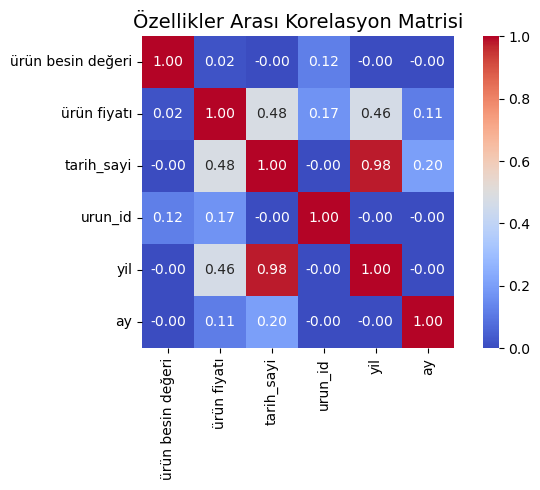

In [49]:

# Görselleştirme
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Özellikler Arası Korelasyon Matrisi", fontsize=14)
plt.tight_layout()
plt.show()

<Axes: xlabel='ürün fiyatı'>

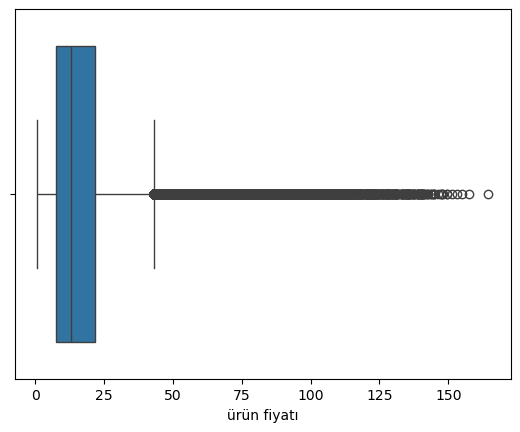

In [50]:
sns.boxplot(x=df['ürün fiyatı'])


In [51]:
Q1 = df['ürün fiyatı'].quantile(0.25)
Q3 = df['ürün fiyatı'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# Aykırı olmayanlar:
temiz_df = df[(df['ürün fiyatı'] >= alt_sinir) & (df['ürün fiyatı'] <= ust_sinir)]

temiz_df

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,tarih_sayi,urun_id,yil,ay
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S,737060,65,2019,1
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S,737060,70,2019,1
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S,737060,61,2019,1
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S,737060,1,2019,1
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S,737060,2,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...
227510,2023-12-01,Nar,77,meyve,38.35,Yurt dışı,Y,H,738855,39,2023,12
227511,2023-12-01,Portakal,41,meyve,15.99,Yurt dışı,Y,H,738855,48,2023,12
227512,2023-12-01,Şeftali,49,meyve,21.58,Yurt dışı,Y,H,738855,77,2023,12
227513,2023-12-01,Üzüm,74,meyve,21.56,Yurt dışı,Y,H,738855,75,2023,12


In [52]:
from scipy.stats import zscore
df['z_score'] = zscore(df['ürün fiyatı'])

temiz_df = df[df['z_score'].abs() < 3]
temiz_df

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,tarih_sayi,urun_id,yil,ay,z_score
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S,737060,65,2019,1,1.083665
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S,737060,70,2019,1,-0.413174
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S,737060,61,2019,1,-0.402117
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S,737060,1,2019,1,-0.689599
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S,737060,2,2019,1,-0.258377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227511,2023-12-01,Portakal,41,meyve,15.99,Yurt dışı,Y,H,738855,48,2023,12,-0.071099
227512,2023-12-01,Şeftali,49,meyve,21.58,Yurt dışı,Y,H,738855,77,2023,12,0.315204
227513,2023-12-01,Üzüm,74,meyve,21.56,Yurt dışı,Y,H,738855,75,2023,12,0.313822
227514,2023-12-01,Vişne,57,meyve,17.12,Yurt dışı,Y,H,738855,53,2023,12,0.006991


In [53]:
# Aykırı değerlerle başa çıkmak için 
df['log_fiyat'] = np.log1p(df['ürün fiyatı'])
df

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,tarih_sayi,urun_id,yil,ay,z_score,log_fiyat
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S,737060,65,2019,1,1.083665,3.517498
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S,737060,70,2019,1,-0.413174,2.488234
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S,737060,61,2019,1,-0.402117,2.501436
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S,737060,1,2019,1,-0.689599,2.084429
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S,737060,2,2019,1,-0.258377,2.658860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227515,2023-12-01,fındık,110,kuruyemiş,57.51,Yurt dışı,Y,H,738855,59,2023,12,2.798188,4.069198
227516,2023-12-01,fıstık,115,kuruyemiş,70.25,Yurt dışı,Y,H,738855,60,2023,12,3.678601,4.266195
227517,2023-12-01,kaju,100,kuruyemiş,70.21,Yurt dışı,Y,H,738855,62,2023,12,3.675836,4.265633
227518,2023-12-01,badem,110,kuruyemiş,62.87,Yurt dışı,Y,H,738855,55,2023,12,3.168597,4.156850


In [54]:
# Besin değeri sıfır olanları küçük bir değerle değiştiriyoruz (bölme hatası olmasın diye)
df.replace({'ürün besin değeri': {0: 0.01}}, inplace=True)
df['fiyat_besin_orani'] = df['ürün fiyatı'] / df['ürün besin değeri']
df['log_fiyat'] = np.log1p(df['ürün fiyatı'])

In [55]:
df['market_şehir'] = df['market'] + '_' + df['şehir']
df['ürün_kategori_ürün'] = df['ürün kategorisi'] + '_' + df['ürün']
df['ürün_şehir'] = df['ürün'] + '_' + df['şehir']

In [56]:
df['ürün_kat_ortalama'] = df.groupby('ürün kategorisi')['ürün fiyatı'].transform('mean')

In [57]:
df['şehir_ortalama'] = df.groupby('şehir')['ürün fiyatı'].transform('mean')

In [58]:
market_ortalama = df.groupby('market')['ürün fiyatı'].transform('mean')
df['market_fark'] = df['ürün fiyatı'] 

In [59]:
df['şehir_kategori_ortalama'] = df.groupby(['şehir', 'ürün kategorisi'])['ürün fiyatı'].transform('mean')

| Korelasyon Katsayısı | Anlamı                            |
| -------------------- | --------------------------------- |
| 0.70 – 1.00          | Çok güçlü pozitif ilişki          |
| 0.40 – 0.70          | Güçlü ilişki                      |
| 0.20 – 0.40          | Zayıf ama anlamlı ilişki olabilir |
| 0.00 – 0.20          | Çok zayıf veya yok                |
| Negatif değerler     | Ters yönlü ilişki                 |


In [60]:
# Sadece sayısal değişkenleri al
numeric_df = df.select_dtypes(include=[np.number])


corr_matrix = numeric_df.corr()
corr_matrix

,ürün besin değeri,ürün fiyatı,tarih_sayi,urun_id,yil,ay,z_score,log_fiyat,fiyat_besin_orani,ürün_kat_ortalama,şehir_ortalama,market_fark,şehir_kategori_ortalama
ürün besin değeri,1.000000e+00,0.016097,-1.035824e-14,1.203882e-01,-8.628652e-15,-2.925478e-15,0.016097,-0.051641,-0.498267,-1.928812e-02,4.562123e-16,0.016097,-1.928496e-02
ürün fiyatı,1.609732e-02,1.000000,4.781435e-01,1.712166e-01,4.649085e-01,1.134083e-01,1.000000,0.891259,0.421599,5.365030e-01,2.165042e-03,1.000000,5.365910e-01
tarih_sayi,-1.035824e-14,0.478143,1.000000e+00,-2.789210e-15,9.799326e-01,1.993246e-01,0.478143,0.509983,0.330707,-1.387078e-14,-6.957849e-13,0.478143,-9.584473e-15
urun_id,1.203882e-01,0.171217,-2.789210e-15,1.000000e+00,-3.159844e-15,-5.159380e-16,0.171217,0.178371,-0.197836,4.702626e-01,5.696339e-16,0.171217,4.701856e-01
yil,-8.628652e-15,0.464909,9.799326e-01,-3.159844e-15,1.000000e+00,-3.256413e-13,0.464909,0.498434,0.321553,-1.456952e-14,-7.584550e-13,0.464909,-9.429669e-15
ay,-2.925478e-15,0.113408,1.993246e-01,-5.159380e-16,-3.256413e-13,1.000000e+00,0.113408,0.108206,0.078441,6.043851e-16,2.240412e-13,0.113408,-3.370144e-15
z_score,1.609732e-02,1.000000,4.781435e-01,1.712166e-01,4.649085e-01,1.134083e-01,1.000000,0.891259,0.421599,5.365030e-01,2.165042e-03,1.000000,5.365910e-01
log_fiyat,-5.164080e-02,0.891259,5.099834e-01,1.783706e-01,4.984341e-01,1.082057e-01,0.891259,1.000000,0.437173,5.506731e-01,2.229651e-03,0.891259,5.506867e-01
fiyat_besin_orani,-4.982674e-01,0.421599,3.307071e-01,-1.978362e-01,3.215526e-01,7.844115e-02,0.421599,0.437173,1.000000,3.757694e-02,1.863589e-03,0.421599,3.765088e-02
ürün_kat_ortalama,-1.928812e-02,0.536503,-1.387078e-14,4.702626e-01,-1.456952e-14,6.043851e-16,0.536503,0.550673,0.037577,1.000000e+00,1.107387e-16,0.536503,9.998361e-01


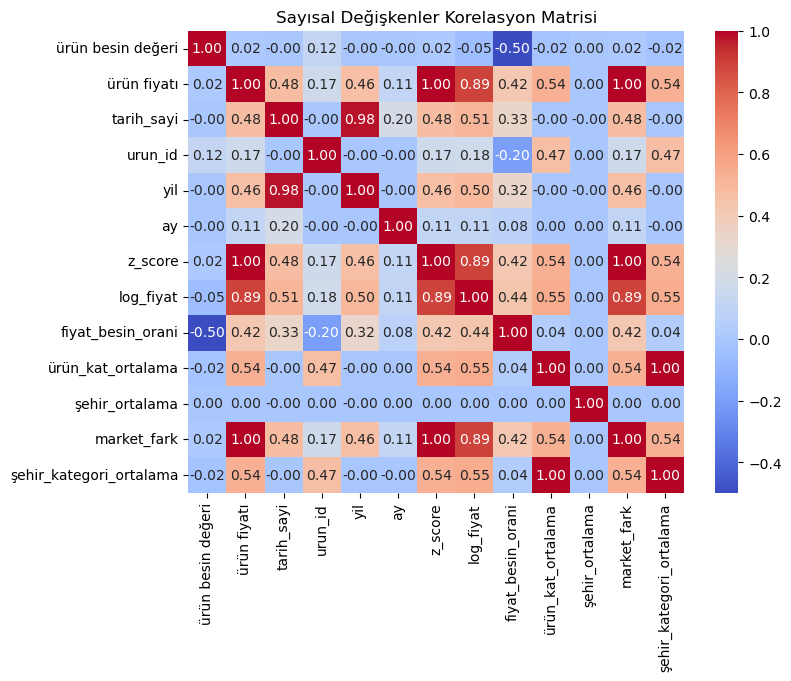

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()


EDA(Exploratory Data Analysis) kısmı sonrası model eğitimi aşaması

Modeli eğitmeden önce belirli bir ürün ile seçilen modelin doğruluğunun tespiti

Son kod bloğunda ise, seçilen model ile testFeatures.csv dosyasındaki her ürünün fiyat tahmininin submission.csv dosyasında depolanması

SARIMAX Validation RMSE (2023): 4.33 TL
SARIMAX Validation MAE  (2023): 1.31 TL


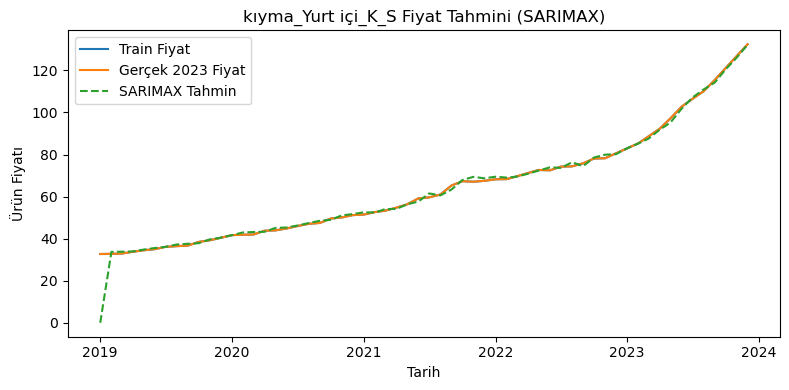

In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Uyarıları bastır
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 1. Veriyi yükle ve filtrele
df = pd.read_csv("train.csv", parse_dates=["tarih"])
df["new_id"] = df["ürün"] + "_" + df["ürün üretim yeri"] + "_" + df["market"] + "_" + df["şehir"]
target_id = "kıyma_Yurt içi_K_S"
ts = df[df["new_id"] == target_id].set_index("tarih")["ürün fiyatı"].sort_index()

# 2. Eğitim / validasyon ayrımı: 2019-2022 eğitim, 2023 validasyon
# (1) Zaman serilerine frekans atama
train_ts = ts.asfreq('MS')
val_ts   = ts.asfreq('MS')


# (2) Daha basit bir seasonal_order deneyin
sarimax_model = SARIMAX(
    train_ts,
    order=(1,0,10),
    seasonal_order=(0,0,1,12),   # Yıllık mevsimsellik: fark+MA
    enforce_stationarity=False,
    enforce_invertibility=False
)


res = sarimax_model.fit(disp=False)

# 4. 2023 tahmini
pred = res.predict(start=val_ts.index[0], end=val_ts.index[-1])

# 5. Değerlendirme
rmse  = np.sqrt(mean_squared_error(val_ts, pred))
mae   = mean_absolute_error(val_ts, pred)
print(f"SARIMAX Validation RMSE (2023): {rmse:.2f} TL")
print(f"SARIMAX Validation MAE  (2023): {mae:.2f} TL")

# 6. Grafik
plt.figure(figsize=(8,4))
plt.plot(train_ts.index, train_ts, label="Train Fiyat")
plt.plot(val_ts.index, val_ts, label="Gerçek 2023 Fiyat")
plt.plot(pred.index, pred, linestyle="--", label="SARIMAX Tahmin")
plt.xlabel("Tarih")
plt.ylabel("Ürün Fiyatı")
plt.title(f"{target_id} Fiyat Tahmini (SARIMAX)")
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# uyarıları bastır
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 1. Veriyi yükle
train = pd.read_csv("train.csv", parse_dates=["tarih"])
test  = pd.read_csv("testFeatures.csv", parse_dates=["tarih"])

# 2. new_id sütununu hem train hem test için oluştur
for df in (train, test):
    df["new_id"] = (
        df["ürün"] + "_" +
        df["ürün üretim yeri"] + "_" +
        df["market"] + "_" +
        df["şehir"]
    )

# 3. Tahminleri toplamak için bir liste
predictions = []

# 4. Her bir unique new_id grubunu sırayla ele al
for uid, grp in test.groupby("new_id"):
    # a) Geçmiş zaman serisini hazırla
    ts = (train[train["new_id"] == uid]
          .set_index("tarih")["ürün fiyatı"]
          .sort_index())
    if len(ts) < 24:  # yetersiz veri varsa atla
        continue

    # b) SARIMAX’i 2019–2022 arasıyla eğit
    train_ts = ts["2019-01-01":"2023-12-31"].asfreq("MS").ffill()
    model = SARIMAX(
        train_ts,
        order=(1,0,10),
        seasonal_order=(0,0,1,12),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    res = model.fit(method='nm', maxiter=200, disp=False)


    # c) Bu grup içindeki test tarihlerdisp024) ve id’lerini al
    sub = grp[grp["tarih"].dt.year == 2024][["id","tarih"]].copy()
    sub = sub.set_index("tarih").sort_index()

    # d) Aylık frekanslı index oluştur
    sub = sub.asfreq("MS")

    # e) Tahminleri al
    sub["ürün fiyatı"] = res.predict(
        start=sub.index[0],
        end=sub.index[-1]
    ).values

    # f) id ve predicted_price’ı topla
    predictions.append(sub[["id","ürün fiyatı"]])

# 5. Tüm grupları birleştir ve submission formatı oluştur
submission = pd.concat(predictions).reset_index(drop=True)

# 6. İstenirse id’ye göre sırala ve ürün fiyatını yuvarla
submission = submission.sort_values(by="id").reset_index(drop=True)
submission["ürün fiyatı"] = submission["ürün fiyatı"].round(2)

# 7. İstenirse CSV’ye yaz
submission.to_csv("submission.csv", index=False)
print("submission.csv oluşturuldu. İlk birkaç satır:")
print(submission.head())

submission.csv oluşturuldu. İlk birkaç satır:
   id  ürün fiyatı
0   0       138.37
1   1        45.05
2   2        52.82
3   3        32.02
4   4        54.57
